<a href="https://colab.research.google.com/github/tessajwu/Tessa_Portfolio/blob/main/BA305FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import savefig
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
%matplotlib inline
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import io
from google.colab import files
files.upload()

Saving allgameceltic23.csv to allgameceltic23 (1).csv
Saving finalfullcelticdata.csv to finalfullcelticdata (1).csv


{'allgameceltic23.csv': b'game_date,season_id,team_id,team_abbreviation,team_name,matchup,wl,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus,team1,team2,elo1_pre,elo2_pre,elo1_post,elo2_post,raptor1_pre,raptor2_pre,score1,score2,quality,importance,total_rating\r\n2022-10-18,2023,1610612738,BOS,Boston Celtics,BOS vs. PHI,1.0,46.0,82.0,0.561,12.0,35.0,0.343,22.0,28.0,0.786,6.0,30.0,36.0,24.0,8.0,3.0,11.0,24.0,126,9,BOS,PHI,1657.63974912662,1582.24732707837,1662.1988835837,1577.68819262129,1693.24307892722,1641.87672921531,126.0,117.0,96,13.0,55.0\r\n2022-10-21,2023,1610612738,BOS,Boston Celtics,BOS @ MIA,1.0,41.0,79.0,0.519,14.0,33.0,0.424,15.0,15.0,1.0,12.0,31.0,43.0,17.0,4.0,11.0,20.0,23.0,111,7,BOS,MIA,1662.1988835837,1598.81471441712,1671.77551676643,1589.23808123439,1690.60271534175,1640.93918980306,111.0,104.0,96,23.0,60.0\r\n2022-10-22,2023,1610612738,BOS,Boston Celtics,BOS @ ORL,1.0,42.0,87.0,0.483,19.0,47.0,0.404,23.0,28.0,0.821,7.

# Import Data

In [ ]:
#Import Data using Pandas
df = pd.read_csv("finalfullcelticdata.csv")
df

,Unnamed: 0,season_id,game_id,game_date,team_id,team_abbreviation,matchup,wl_x,fgm,fga,...,elo1_pre,elo2_pre,elo1_post,elo2_post,raptor1_pre,raptor2_pre,score1,score2,quality,wl_y
0,236,22018,21800001,2018-10-16,1610612738,BOS,BOS @ PHI,1,42.0,97.0,...,1561.524193,1607.057688,1573.849372,1594.732509,1633.000000,1617.000000,105.0,87.0,90,1.0
1,41,22018,21800019,2018-10-19,1610612738,BOS,BOS @ TOR,0,40.0,99.0,...,1573.849372,1583.693415,1566.426450,1591.116337,1638.194302,1650.738829,101.0,113.0,93,0.0
2,42,22018,21800028,2018-10-20,1610612738,BOS,BOS @ NYK,1,33.0,82.0,...,1566.426450,1416.078229,1570.402809,1412.101870,1629.249779,1324.092286,103.0,101.0,34,1.0
3,237,22018,21800040,2018-10-22,1610612738,BOS,BOS @ ORL,0,37.0,91.0,...,1570.402809,1361.192831,1557.690507,1373.905133,1619.735071,1418.917713,90.0,93.0,56,0.0
4,43,22018,21800065,2018-10-25,1610612738,BOS,BOS @ OKC,1,33.0,86.0,...,1557.690507,1543.602601,1568.006304,1533.286804,1615.158050,1620.939695,101.0,95.0,89,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,388,22021,22101153,2022-04-01,1610612738,BOS,BOS @ IND,1,45.0,83.0,...,1697.263668,1384.827425,1698.164946,1383.926147,1668.840030,1357.900458,128.0,123.0,49,1.0
304,389,22021,22101166,2022-04-03,1610612738,BOS,BOS @ WAS,1,56.0,91.0,...,1698.164946,1421.369553,1702.581960,1416.952539,1688.421181,1400.146479,144.0,102.0,63,1.0
305,192,22021,22101193,2022-04-06,1610612738,BOS,BOS @ CHI,1,43.0,88.0,...,1702.581960,1475.917946,1713.258387,1465.241519,1673.897392,1467.660337,117.0,94.0,75,1.0
306,193,22021,22101198,2022-04-07,1610612738,BOS,BOS @ MIL,0,43.0,87.0,...,1713.258387,1570.220094,1704.262923,1579.215557,1568.875599,1635.349110,121.0,127.0,86,0.0


# Data Visualization

In [ ]:
#Data Visualization
df2 = df.drop(columns = ['wl_x'])
df2.rename(columns={'wl_y':'wl'}, inplace=True)
df2.columns

Index(['Unnamed: 0', 'season_id', 'game_id', 'game_date', 'team_id',
       'team_abbreviation', 'matchup', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a',
       'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'plus_minus', 'date', 'season', 'team',
       'elo1_pre', 'elo2_pre', 'elo1_post', 'elo2_post', 'raptor1_pre',
       'raptor2_pre', 'score1', 'score2', 'quality', 'wl'],
      dtype='object')

1    184
0    124
Name: wl_x, dtype: int64

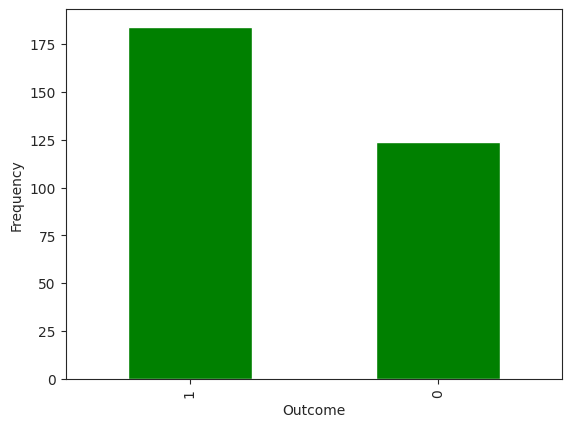

In [ ]:
# Finding 1.
fig, ax = plt.subplots()
df['wl_x'].value_counts().plot(ax=ax, kind='bar', xlabel='Outcome', ylabel='Frequency', color = 'g')
df['wl_x'].value_counts()

<Axes: xlabel='reb', ylabel='Count'>

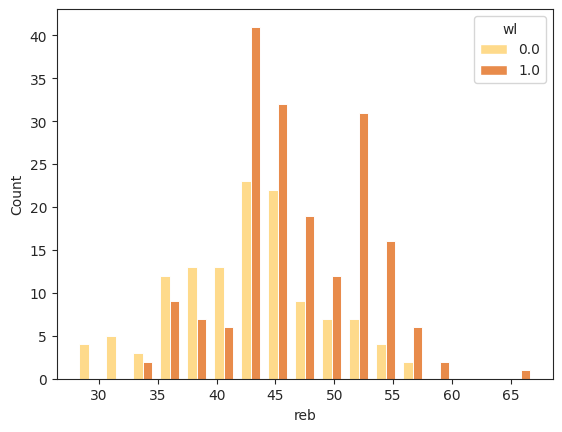

In [ ]:
#Histogram of Rebounds based off Wins/Losses
sns.histplot(data = df2, x = 'reb', hue = 'wl', multiple = 'dodge', palette = 'YlOrBr', shrink = 0.7)

<Axes: xlabel='pf', ylabel='Count'>

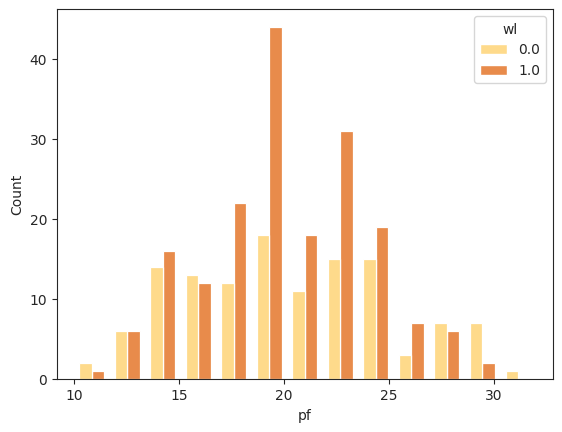

In [ ]:
#Histogram of Personal Fouls based off Wins/Losses
sns.histplot(data = df2, x = 'pf', hue = 'wl', multiple = 'dodge', palette = 'YlOrBr', shrink = 0.7)

<Axes: xlabel='pts', ylabel='Count'>

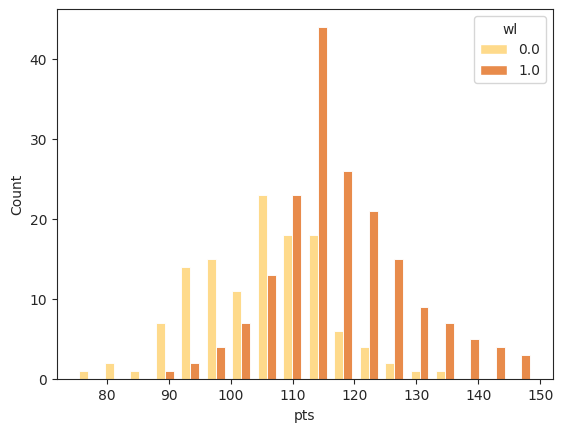

In [ ]:
#Histogram of Points based off Wins/Losses
sns.histplot(data = df2, x = 'pts', hue = 'wl', multiple = 'dodge', palette = 'YlOrBr', shrink = 0.7)

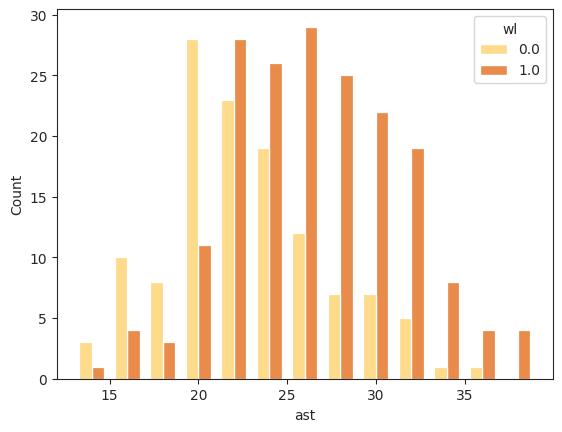

In [ ]:
#Histogram of Assists based off Wins/Losses
sns.histplot(data = df2, x = 'ast', hue = 'wl', multiple = 'dodge', palette = 'YlOrBr', shrink = 0.7)
sns.set_style('ticks')

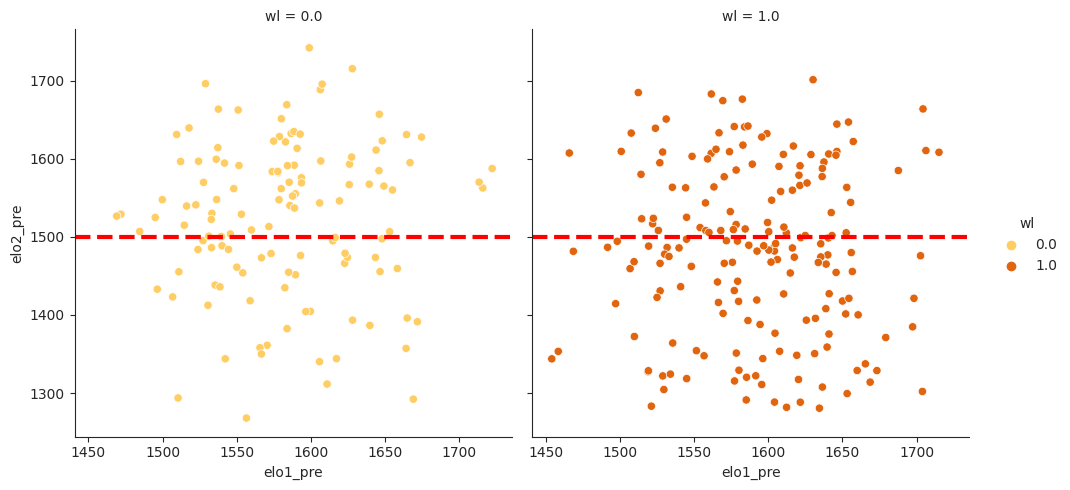

In [ ]:
#
scatter = sns.relplot(
    data=df2, x="elo1_pre", y="elo2_pre",
    col="wl",
    hue = 'wl',
    palette = 'YlOrBr',
    kind="scatter",
)
scatter.refline(y = 1500,
          color = "red",
          lw = 3)

<Axes: xlabel='quality', ylabel='Count'>

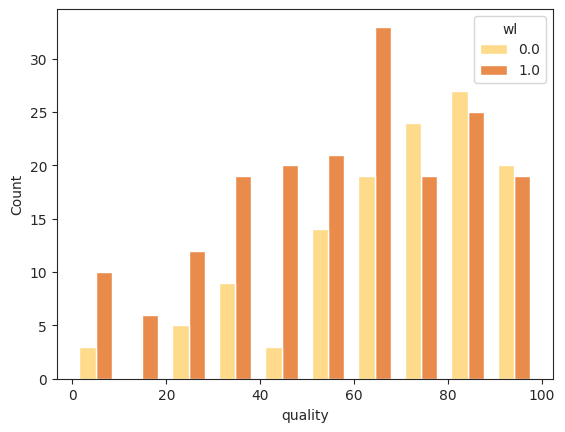

In [ ]:
#Histogram of Quality based off Wins/Losses
sns.histplot(data = df2, x = 'quality', hue = 'wl', multiple = 'dodge', palette = 'YlOrBr', shrink = 0.7)

# PCA

In [ ]:
# Dropping Irrelevant Columns
newdf = df.drop(columns = ['Unnamed: 0', 'game_date', 'season_id','game_id', 'team_id', 'team_abbreviation', 'matchup', 'wl_y','wl_x','plus_minus','elo1_post','elo2_post','date','score1','score2','season','team'])
newdf

,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,...,stl,blk,tov,pf,pts,elo1_pre,elo2_pre,raptor1_pre,raptor2_pre,quality
0,42.0,97.0,0.433,11.0,37.0,0.297,10.0,14.0,0.714,12.0,...,7.0,5.0,15.0,20.0,105,1561.524193,1607.057688,1633.000000,1617.000000,90
1,40.0,99.0,0.404,14.0,36.0,0.389,7.0,10.0,0.700,16.0,...,4.0,6.0,16.0,27.0,101,1573.849372,1583.693415,1638.194302,1650.738829,93
2,33.0,82.0,0.402,9.0,25.0,0.360,28.0,33.0,0.848,11.0,...,8.0,2.0,15.0,26.0,103,1566.426450,1416.078229,1629.249779,1324.092286,34
3,37.0,91.0,0.407,9.0,40.0,0.225,7.0,9.0,0.778,9.0,...,6.0,3.0,12.0,15.0,90,1570.402809,1361.192831,1619.735071,1418.917713,56
4,33.0,86.0,0.384,11.0,32.0,0.344,24.0,33.0,0.727,10.0,...,7.0,1.0,12.0,27.0,101,1557.690507,1543.602601,1615.158050,1620.939695,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,45.0,83.0,0.542,12.0,33.0,0.364,26.0,28.0,0.929,11.0,...,7.0,4.0,16.0,19.0,128,1697.263668,1384.827425,1668.840030,1357.900458,49
304,56.0,91.0,0.615,23.0,44.0,0.523,9.0,13.0,0.692,7.0,...,6.0,5.0,8.0,20.0,144,1698.164946,1421.369553,1688.421181,1400.146479,63
305,43.0,88.0,0.489,17.0,37.0,0.459,14.0,22.0,0.636,8.0,...,11.0,6.0,13.0,18.0,117,1702.581960,1475.917946,1673.897392,1467.660337,75
306,43.0,87.0,0.494,21.0,50.0,0.420,14.0,19.0,0.737,8.0,...,8.0,4.0,16.0,15.0,121,1713.258387,1570.220094,1568.875599,1635.349110,86


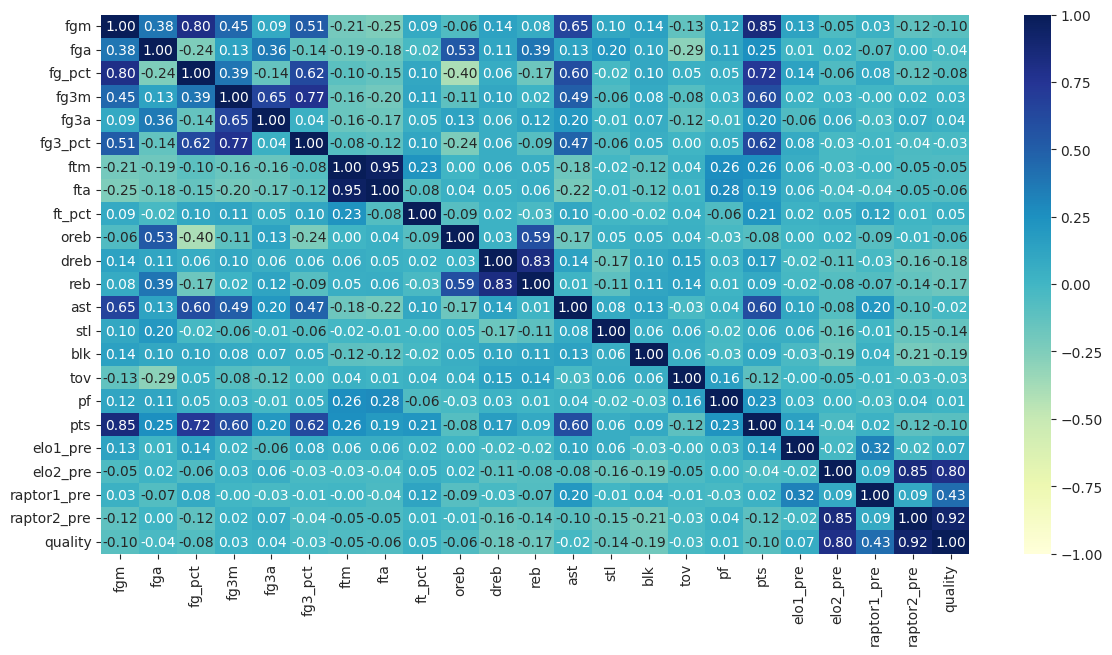

In [ ]:
#Correlation Matrix
plt.figure(figsize=(14,7))
sns.heatmap(newdf.corr(), annot=True, fmt=".2f",vmin=-1,vmax=1, cmap='YlGnBu');

In [ ]:
#PCA w/o Scaled Data
pcs = PCA(n_components=10)
pcs.fit(newdf)
pcsSummary_df = pd.DataFrame({
            '% of variance explained': pcs.explained_variance_ratio_,
            'Cumulative % explained': np.cumsum(pcs.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcsSummary_df.round(3)

,% of variance explained,Cumulative % explained
0,0.743,0.743
1,0.124,0.866
2,0.061,0.928
3,0.057,0.985
4,0.006,0.991
5,0.003,0.993
6,0.002,0.995
7,0.001,0.997
8,0.001,0.998
9,0.001,0.998


In [ ]:
pcs_df = pd.DataFrame(pcs.components_).round(2).transpose()
pcs_df

,0,1,2,3,4,5,6,7,8,9
0,0.00,-0.01,0.01,0.01,-0.30,-0.15,0.11,-0.20,0.17,-0.00
1,-0.00,0.01,0.01,0.00,-0.18,-0.29,-0.43,0.26,0.62,0.01
2,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
3,-0.00,-0.00,0.00,0.00,-0.18,-0.12,0.06,0.17,-0.31,-0.04
4,-0.00,0.01,-0.00,-0.00,-0.16,-0.27,-0.19,0.70,-0.47,0.03
5,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
6,0.00,-0.00,0.01,0.00,-0.08,0.55,-0.14,0.16,-0.01,-0.02
7,0.00,-0.00,0.01,0.00,-0.06,0.67,-0.20,0.21,0.03,-0.01
8,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
9,0.00,0.00,0.01,0.00,0.01,-0.05,-0.27,0.06,0.19,-0.06


In [ ]:
var = list(newdf.columns)
pcs_df.index = [var]
pcs_df

,0,1,2,3,4,5,6,7,8,9
fgm,0.00,-0.01,0.01,0.01,-0.30,-0.15,0.11,-0.20,0.17,-0.00
fga,-0.00,0.01,0.01,0.00,-0.18,-0.29,-0.43,0.26,0.62,0.01
fg_pct,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
fg3m,-0.00,-0.00,0.00,0.00,-0.18,-0.12,0.06,0.17,-0.31,-0.04
fg3a,-0.00,0.01,-0.00,-0.00,-0.16,-0.27,-0.19,0.70,-0.47,0.03
fg3_pct,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
ftm,0.00,-0.00,0.01,0.00,-0.08,0.55,-0.14,0.16,-0.01,-0.02
fta,0.00,-0.00,0.01,0.00,-0.06,0.67,-0.20,0.21,0.03,-0.01
ft_pct,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
oreb,0.00,0.00,0.01,0.00,0.01,-0.05,-0.27,0.06,0.19,-0.06


In [ ]:
#Scale Data with StandardScaler
scaled_array = preprocessing.scale(newdf)
scaled_df = pd.DataFrame(scaled_array)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.121580,1.181009,-0.604520,-0.510743,0.205092,-0.805293,-1.145448,-0.970645,-0.956881,0.465557,...,-0.344604,-0.200917,0.399024,-0.042587,-0.610848,-0.484851,1.024790,0.656461,1.056054,1.139841
1,-0.276788,1.479533,-1.142166,0.259121,0.053971,0.304246,-1.650648,-1.523504,-1.109642,1.621941,...,-1.435064,0.181073,0.676449,1.626838,-0.933561,-0.254298,0.803362,0.744827,1.324285,1.262736
2,-1.671073,-1.057917,-1.179245,-1.023986,-1.608350,-0.045500,1.885752,1.655436,0.505259,0.176461,...,0.018882,-1.346889,0.399024,1.388349,-0.772205,-0.393150,-0.785161,0.592661,-1.272620,-1.154205
3,-0.874339,0.285439,-1.086548,-1.023986,0.658452,-1.673627,-1.650648,-1.661719,-0.258546,-0.401731,...,-0.708091,-0.964898,-0.433252,-1.235034,-1.821020,-0.318769,-1.305321,0.430794,-0.518739,-0.252973
4,-1.671073,-0.460870,-1.512956,-0.510743,-0.550509,-0.238463,1.212152,1.655436,-0.815032,-0.112635,...,-0.344604,-1.728879,-0.433252,1.626838,-0.933561,-0.556563,0.423413,0.352929,1.087376,1.098876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.719131,-0.908655,1.416286,-0.254122,-0.399389,0.002741,1.548952,0.964362,1.389089,0.176461,...,-0.344604,-0.582908,0.676449,-0.281077,1.244748,2.054269,-1.081331,1.266180,-1.003838,-0.539729
304,2.910151,0.285439,2.769670,2.568715,1.262932,1.920313,-1.313848,-1.108860,-1.196934,-0.979923,...,-0.708091,-0.200917,-1.542953,-0.042587,2.535597,2.071129,-0.735014,1.599299,-0.667974,0.033783
305,0.320763,-0.162346,0.433692,1.028986,0.205092,1.148460,-0.471848,0.135074,-1.807977,-0.690827,...,1.109342,0.181073,-0.155827,-0.519566,0.357289,2.153752,-0.218048,1.352217,-0.131225,0.525364
306,0.320763,-0.311608,0.526390,2.055472,2.169653,0.678112,-0.471848,-0.279571,-0.705917,-0.690827,...,0.018882,-0.582908,0.676449,-1.235034,0.680001,2.353464,0.675672,-0.434439,1.201933,0.975980


In [ ]:
#PCA with Scaled Data
newpcs = PCA(n_components=9)
newpcs.fit(scaled_df)

# view the importance of principal components
pcsSummary_df = pd.DataFrame({
            'Proportion of variance': newpcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(newpcs.explained_variance_ratio_)
            })
pcsSummary_df.round(3)

,Proportion of variance,Cumulative proportion
0,0.191,0.191
1,0.133,0.324
2,0.111,0.435
3,0.098,0.532
4,0.069,0.601
5,0.063,0.664
6,0.052,0.717
7,0.047,0.764
8,0.044,0.808


In [ ]:
pd.DataFrame(newpcs.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4,5,6,7,8
fgm,0.42,-0.01,0.06,0.02,0.07,-0.17,0.27,-0.14,-0.12
fga,0.08,0.12,0.46,0.11,0.34,-0.15,0.13,-0.06,-0.08
fg_pct,0.38,-0.08,-0.23,-0.05,-0.15,-0.08,0.21,-0.10,-0.07
fg3m,0.36,-0.10,0.13,0.03,0.05,0.33,-0.26,0.18,0.19
fg3a,0.13,-0.03,0.34,0.04,0.21,0.30,-0.40,0.26,0.20
fg3_pct,0.36,-0.10,-0.12,0.01,-0.09,0.20,-0.01,0.03,0.08
ftm,-0.08,0.10,-0.31,0.51,0.15,0.06,-0.16,-0.02,-0.10
fta,-0.11,0.12,-0.30,0.49,0.17,0.07,-0.02,-0.04,0.13
ft_pct,0.08,-0.06,-0.07,0.10,-0.02,-0.04,-0.46,0.04,-0.72
oreb,-0.10,0.18,0.38,0.18,0.11,-0.14,0.08,0.04,-0.05


In [ ]:
eig=newpcs.explained_variance_.round(2)
print(eig)

[4.41 3.07 2.56 2.25 1.58 1.46 1.21 1.09 1.02]


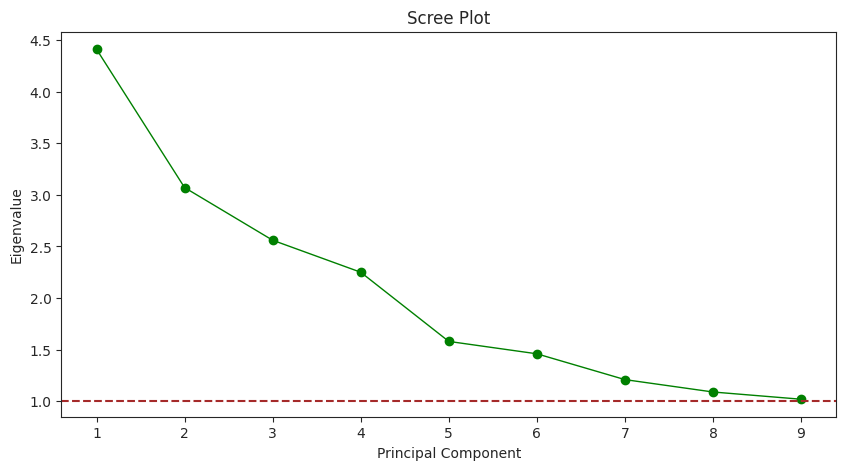

In [ ]:
#Scree Plot of Eigenvalues vs. Principal Components
xvals = np.arange(1,10,step=1);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, color='green', marker='o', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue
plt.axhline(y=1, color='brown', linestyle='--')

In [ ]:
#Producing DataFrame of Principal Components
newpcs.fit(scaled_df)
principalComponents = newpcs.fit_transform(scaled_df)
principalDF = pd.DataFrame(
        principalComponents.round(3), 
        columns = ['Scoring','OpponentStrength','SecondChance','FreeThrows','DefensiveRebounding','CelticStrength', 'PerimeterShooting','Turnovers','FreeThrowEfficiency']
        )
principalDF

,Scoring,OpponentStrength,SecondChance,FreeThrows,DefensiveRebounding,CelticStrength,PerimeterShooting,Turnovers,FreeThrowEfficiency
0,-1.099,-0.603,2.975,0.452,-1.707,-0.633,0.896,-0.176,0.277
1,-0.499,-1.527,3.144,-0.083,-0.767,-0.396,1.266,1.071,1.422
2,-2.509,2.002,-2.585,1.592,-0.161,0.043,-0.409,0.128,-0.024
3,-2.145,1.182,1.946,-2.146,-1.530,-0.186,-1.075,-1.210,0.352
4,-3.124,-1.030,-0.826,2.175,0.344,0.866,0.415,-0.054,1.122
...,...,...,...,...,...,...,...,...,...
303,1.502,0.307,-2.909,0.806,0.641,-1.908,-1.427,-0.150,-0.193
304,6.686,-1.561,-0.214,-1.236,0.930,-1.063,-0.435,-1.209,2.599
305,1.702,-0.917,-0.476,-0.621,0.434,-1.579,-0.435,0.336,2.347
306,2.115,-2.108,0.898,0.113,-0.239,0.392,-1.181,0.650,1.550


# Logistic Regression

In [ ]:
#Performing Logistic Regression
df['wl_x'] = df['wl_x'].astype('category')
X_log = principalDF
y_log = df['wl_x']
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size = 0.3, random_state = 1, stratify = y_log)

In [ ]:
lr = LogisticRegression(penalty='l1', solver= 'liblinear')
lr.fit(X_log_train, y_log_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
y_log_pred = lr.predict(X_log_test)
y_log_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1])

<Axes: >

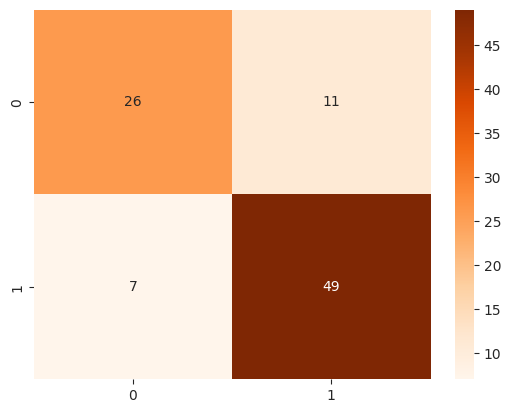

In [ ]:
#Confusion Matrix of Logistic Regression
cm_log = confusion_matrix(y_log_test,y_log_pred)
sns.heatmap(cm_log, annot= True, cmap = 'Oranges')

In [ ]:
#Accuracy Score w/o CV
accuracy_score(y_log_test, y_log_pred)

0.8064516129032258

In [ ]:
#Accuracy Score of Logistic Regression with CV=10
cross_val_score(lr, X_log_train, y_log_train, cv = 10, scoring = "accuracy").mean()

0.8422077922077923

In [ ]:
#Reading in '23 Celtics Season to Predict Wins/Losses
celt23 = pd.read_csv("allgameceltic23.csv")
celt23

,game_date,season_id,team_id,team_abbreviation,team_name,matchup,wl,fgm,fga,fg_pct,...,elo2_pre,elo1_post,elo2_post,raptor1_pre,raptor2_pre,score1,score2,quality,importance,total_rating
0,2022-10-18,2023,1610612738,BOS,Boston Celtics,BOS vs. PHI,1.0,46.0,82.0,0.561,...,1582.247327,1662.198884,1577.688193,1693.243079,1641.876729,126.0,117.0,96,13.0,55.0
1,2022-10-21,2023,1610612738,BOS,Boston Celtics,BOS @ MIA,1.0,41.0,79.0,0.519,...,1598.814714,1671.775517,1589.238081,1690.602715,1640.939190,111.0,104.0,96,23.0,60.0
2,2022-10-22,2023,1610612738,BOS,Boston Celtics,BOS @ ORL,1.0,42.0,87.0,0.483,...,1359.479715,1674.784059,1356.471173,1675.723344,1298.291561,126.0,120.0,35,2.0,19.0
3,2022-10-24,2023,1610612738,BOS,Boston Celtics,BOS @ CHI,0.0,37.0,100.0,0.370,...,1433.372302,1650.982958,1457.173403,1698.722957,1478.642911,102.0,120.0,80,17.0,49.0
4,2022-10-28,2023,1610612738,BOS,Boston Celtics,BOS vs. CLE,0.0,42.0,82.0,0.512,...,1523.839775,1632.257192,1542.565541,1699.080758,1505.469046,123.0,132.0,84,11.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2023-03-31,2023,1610612738,BOS,Boston Celtics,BOS vs. UTA,1.0,42.0,96.0,0.438,...,1434.618633,1674.570193,1432.833259,1675.361311,1296.943320,122.0,114.0,35,3.0,19.0
78,2023-04-04,2023,1610612738,BOS,Boston Celtics,BOS @ PHI,0.0,38.0,91.0,0.418,...,1644.846234,1670.908426,1648.508000,1682.247908,1642.253154,101.0,103.0,95,17.0,56.0
79,2023-04-05,2023,1610612738,BOS,Boston Celtics,BOS vs. TOR,1.0,38.0,89.0,0.427,...,1566.821369,1673.474393,1564.255402,1611.751488,1596.172890,97.0,93.0,86,64.0,75.0
80,2023-04-07,2023,1610612738,BOS,Boston Celtics,BOS vs. TOR,1.0,45.0,81.0,0.556,...,1564.255402,1679.722444,1558.007352,1617.256878,1596.593344,121.0,102.0,87,13.0,50.0


In [ ]:
newcelt23 = celt23.drop(columns = ['game_date', 'season_id', 'team_id', 'team_abbreviation', 'team_name',
       'matchup', 'wl', 'team1', 'team2','plus_minus','score1', 'score2', 'importance', 'total_rating','elo1_post', 'elo2_post', ])
newcelt23

,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,...,stl,blk,tov,pf,pts,elo1_pre,elo2_pre,raptor1_pre,raptor2_pre,quality
0,46.0,82.0,0.561,12.0,35.0,0.343,22.0,28.0,0.786,6.0,...,8.0,3.0,11.0,24.0,126,1657.639749,1582.247327,1693.243079,1641.876729,96
1,41.0,79.0,0.519,14.0,33.0,0.424,15.0,15.0,1.000,12.0,...,4.0,11.0,20.0,23.0,111,1662.198884,1598.814714,1690.602715,1640.939190,96
2,42.0,87.0,0.483,19.0,47.0,0.404,23.0,28.0,0.821,7.0,...,5.0,6.0,8.0,21.0,126,1671.775517,1359.479715,1675.723344,1298.291561,35
3,37.0,100.0,0.370,18.0,48.0,0.375,10.0,12.0,0.833,14.0,...,5.0,7.0,11.0,24.0,102,1674.784059,1433.372302,1698.722957,1478.642911,80
4,42.0,82.0,0.512,13.0,33.0,0.394,26.0,32.0,0.813,5.0,...,9.0,2.0,19.0,27.0,123,1650.982958,1523.839775,1699.080758,1505.469046,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,42.0,96.0,0.438,17.0,51.0,0.333,21.0,22.0,0.955,10.0,...,8.0,4.0,11.0,14.0,122,1672.784819,1434.618633,1675.361311,1296.943320,35
78,38.0,91.0,0.418,15.0,45.0,0.333,10.0,16.0,0.625,13.0,...,4.0,4.0,8.0,17.0,101,1674.570193,1644.846234,1682.247908,1642.253154,95
79,38.0,89.0,0.427,11.0,38.0,0.289,10.0,18.0,0.556,11.0,...,5.0,7.0,15.0,14.0,97,1670.908426,1566.821369,1611.751488,1596.172890,86
80,45.0,81.0,0.556,15.0,44.0,0.341,16.0,21.0,0.762,13.0,...,4.0,7.0,19.0,14.0,121,1673.474393,1564.255402,1617.256878,1596.593344,87


In [ ]:
#Scaled Data for PCA
scaledcelt23 = preprocessing.scale(newcelt23)
scaleddf23 = pd.DataFrame(scaledcelt23)
scaleddf23

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.669407,-0.574564,1.605121,-0.853753,-0.993738,-0.409027,0.747148,0.923108,-0.268652,-0.892904,...,0.622064,-0.906459,-0.579991,1.378947,0.597814,0.175404,0.931334,1.158531,1.375573,1.082812
1,-0.123821,-0.876579,0.809491,-0.407844,-1.277169,0.622392,-0.363896,-0.872573,2.020959,0.611578,...,-0.825006,2.397080,2.014150,1.128229,-0.364635,0.366855,1.116825,1.047243,1.366676,1.082812
2,0.034825,-0.071207,0.127523,0.706929,0.706850,0.367720,0.905868,0.923108,0.105817,-0.642157,...,-0.463239,0.332368,-1.444704,0.626794,0.597814,0.769006,-1.562795,0.420094,-1.885170,-2.058850
3,-0.758404,1.237523,-2.013101,0.483974,0.848566,-0.001553,-1.157498,-1.286961,0.234206,1.113072,...,-0.463239,0.745311,-0.579991,1.378947,-0.942105,0.895344,-0.735486,1.389501,-0.173573,0.258769
4,0.034825,-0.574564,0.676886,-0.630798,-1.277169,0.240385,1.382030,1.475626,0.020224,-1.143651,...,0.983831,-1.319401,1.725912,2.131100,0.405324,-0.104134,0.277397,1.404582,0.081017,0.464780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.034825,0.834837,-0.724938,0.261020,1.273713,-0.536362,0.588427,0.094332,1.539499,0.110084,...,0.622064,-0.493516,-0.579991,-1.128229,0.341161,0.811390,-0.721532,0.404835,-1.897965,-2.058850
78,-0.599758,0.331479,-1.103809,-0.184889,0.423419,-0.536362,-1.157498,-0.734444,-1.991210,0.862325,...,-0.825006,-0.493516,-1.444704,-0.376076,-1.006268,0.886363,1.632198,0.695097,1.379146,1.031309
79,-0.599758,0.130136,-0.933317,-1.076707,-0.568591,-1.096639,-1.157498,-0.458185,-2.729449,0.360831,...,-0.463239,0.745311,0.572961,-1.128229,-1.262922,0.732595,0.758624,-2.276247,0.941828,0.567785
80,0.510762,-0.675236,1.510403,-0.184889,0.281703,-0.434494,-0.205175,-0.043797,-0.525431,0.862325,...,-0.825006,0.745311,1.725912,-1.128229,0.276998,0.840347,0.729895,-2.044201,0.945818,0.619288


In [ ]:
# PCA for Season 23
newpcs23 = PCA(n_components=9)
newpcs23.fit(scaleddf23)

# view the importance of principal components
pcsSummary_df = pd.DataFrame({
            'Proportion of variance': newpcs23.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(newpcs23.explained_variance_ratio_)
            })
pcsSummary_df.transpose().round(3)

,0,1,2,3,4,5,6,7,8
Proportion of variance,0.234,0.143,0.126,0.093,0.068,0.060,0.049,0.045,0.036
Cumulative proportion,0.234,0.377,0.503,0.597,0.665,0.725,0.774,0.818,0.854


In [ ]:
pd.DataFrame(newpcs.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4,5,6,7,8
fgm,0.42,-0.01,0.06,0.02,0.07,-0.17,0.27,-0.14,-0.12
fga,0.08,0.12,0.46,0.11,0.34,-0.15,0.13,-0.06,-0.08
fg_pct,0.38,-0.08,-0.23,-0.05,-0.15,-0.08,0.21,-0.10,-0.07
fg3m,0.36,-0.10,0.13,0.03,0.05,0.33,-0.26,0.18,0.19
fg3a,0.13,-0.03,0.34,0.04,0.21,0.30,-0.40,0.26,0.20
fg3_pct,0.36,-0.10,-0.12,0.01,-0.09,0.20,-0.01,0.03,0.08
ftm,-0.08,0.10,-0.31,0.51,0.15,0.06,-0.16,-0.02,-0.10
fta,-0.11,0.12,-0.30,0.49,0.17,0.07,-0.02,-0.04,0.13
ft_pct,0.08,-0.06,-0.07,0.10,-0.02,-0.04,-0.46,0.04,-0.72
oreb,-0.10,0.18,0.38,0.18,0.11,-0.14,0.08,0.04,-0.05


In [ ]:
#Building DataFrame for Newly Named PCs
newpcs23.fit(scaleddf23)
principalComponents = newpcs23.fit_transform(scaleddf23)
principalDF23 = pd.DataFrame(
        principalComponents.round(3), 
        columns = ['Scoring','OpponentStrength','SecondChance','FreeThrows','DefensiveRebounding','CelticStrength', 'PerimeterShooting','Turnovers','FreeThrowEfficiency']
        )

principalDF23

,Scoring,OpponentStrength,SecondChance,FreeThrows,DefensiveRebounding,CelticStrength,PerimeterShooting,Turnovers,FreeThrowEfficiency
0,1.232,0.978,-1.577,3.166,0.668,-0.505,-1.196,0.990,-0.037
1,2.047,0.702,-1.252,1.277,0.939,2.215,3.192,-0.281,-0.488
2,-0.728,-0.494,3.413,1.448,-0.239,-0.161,-1.014,-0.100,0.899
3,0.251,-0.237,0.927,-1.794,1.755,0.367,-0.315,-0.413,0.942
4,1.046,-0.121,-0.346,4.008,1.015,0.091,-1.212,-0.580,-1.335
...,...,...,...,...,...,...,...,...,...
77,-0.946,-1.117,2.971,-0.262,0.950,-1.590,0.100,-0.616,0.932
78,1.370,1.459,-1.584,-2.222,1.250,-0.734,-1.506,0.474,0.529
79,1.882,-0.348,-1.710,-3.172,-0.311,1.414,-1.009,0.579,-1.549
80,-1.339,0.147,-1.998,-0.887,-0.400,1.099,1.386,-0.654,-1.399


In [ ]:
#Accuracy Score for Logistic Regression on Season 23
log_prediction23 = lr.predict(principalDF23)
accuracy_score(log_prediction23, celt23['wl'])

0.4878048780487805

In [ ]:
#Summary Statistics for Logistic Regression
lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef}, index=principalDF23.columns))

intercept  0.8830114484267791
                        coeff
Scoring              0.980127
OpponentStrength     0.436208
SecondChance        -0.044915
FreeThrows           0.537103
DefensiveRebounding -0.712711
CelticStrength      -0.093723
PerimeterShooting   -0.032505
Turnovers           -0.480582
FreeThrowEfficiency -0.283212


# KNN

In [ ]:
#Splitting data for KNN 
X_knn = principalDF
y_knn = df['wl_x']
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size = 0.3, random_state = 1, stratify = y_knn)

In [ ]:
#Examine the shape for each set
print('Training set:', X_knn_train.shape, 'Testing set:', X_knn_test.shape)

Training set: (215, 9) Testing set: (93, 9)


In [ ]:
#Performing KNN w/o Hypertuning
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_knn_train, y_knn_train)
y_knn_pred = knn.predict(X_knn_test) 
#Accuracy Score of KNN w/o CV
accuracy_score(y_knn_test, y_knn_pred)

0.6881720430107527

In [ ]:
# k-NN with hypertunning 
grid_params = { 'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)
g_res = gs.fit(X_knn_train, y_knn_train)
# get the hyperparameters with the best score
print(g_res.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
# use the best hyperparameters for KNN model
hyperknn = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform',metric = 'manhattan')
hyperknn.fit(X_knn_train, y_knn_train)
hyperypred = hyperknn.predict(X_knn_test)
accuracy_score(y_knn_test, hyperypred)

0.7956989247311828

In [ ]:
#Accuracy Score of KNN with CV=10
knnscores = cross_val_score(hyperknn, X_knn_train, y_knn_train, cv =10)
print('Model accuracy: ',np.mean(knnscores))

Model accuracy:  0.8045454545454545


<Axes: >

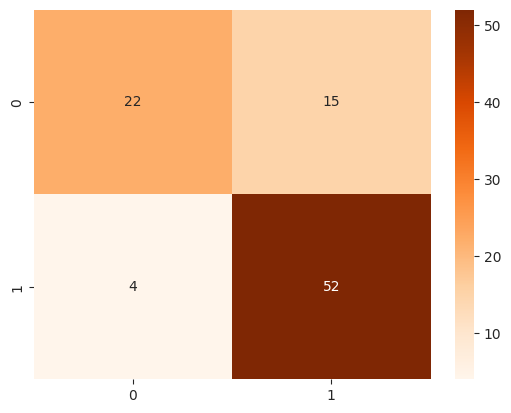

In [ ]:
#Confusion Matrix for Hypertuned KNN
knn_cm = confusion_matrix(y_knn_test, hyperypred)
sns.heatmap(knn_cm, annot =True, cmap='Oranges')

In [ ]:
#Accuracy Score for KNN on Season 23
hyperknn_prediction23 = hyperknn.predict(principalDF23)
accuracy_score(hyperknn_prediction23, celt23['wl'])

0.4878048780487805

# Decision Tree (Full + Pruned)

In [ ]:
#Decision Tree
X_decisionTree = newdf
y_decisionTree = df['wl_x']
X_decisionTree_train, X_decisionTree_test, y_decisionTree_train, y_decisionTree_test = train_test_split(X_decisionTree, y_decisionTree, test_size = 0.3, random_state = 1, stratify = y_decisionTree)

In [ ]:
#Full Tree Construction
full_clf = DecisionTreeClassifier(random_state=1)
full_clf.fit(X_decisionTree_train, y_decisionTree_train)

print('Number of nodes', full_clf.tree_.node_count)
print('# of Leaves', full_clf.tree_.n_leaves)
print('Max Depth', full_clf.tree_.max_depth)

Number of nodes 63
# of Leaves 32
Max Depth 9


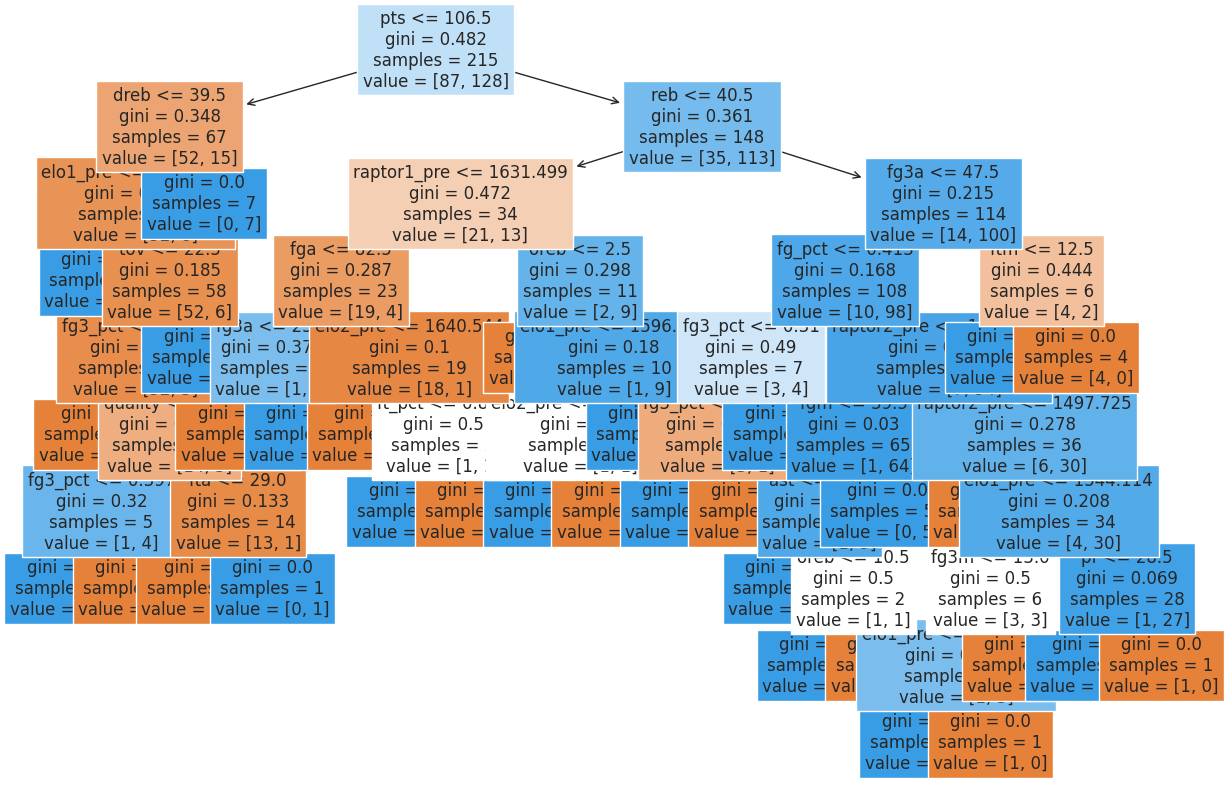

In [ ]:
#Visualize Full Tree
plt.figure(figsize = (15,10))
tree.plot_tree(full_clf, fontsize = 12, feature_names = X_decisionTree.columns, filled=True);

In [ ]:
#Full Tree Accuracy Score w/o CV
y_fullclf_pred = full_clf.predict(X_decisionTree_test)
fullclf_score = accuracy_score(y_decisionTree_test, y_fullclf_pred)
fullclf_score

0.7204301075268817

In [ ]:
#Accuracy Score of Full Tree with CV=10
full_accuracy_scores = cross_val_score(full_clf, X_decisionTree_train, y_decisionTree_train, cv=10)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in full_accuracy_scores])
print('10-fold cross-validation mean accuracy:', round(full_accuracy_scores.mean(),4))

Accuracy scores of each fold:  ['0.773', '0.591', '0.727', '0.727', '0.591', '0.619', '0.524', '0.667', '0.810', '0.667']
10-fold cross-validation mean accuracy: 0.6695


In [ ]:
#Grid Search
param_grid = {
    'max_depth': [6, 9, 12, 15],
    'splitter': ['random', 'best'],
    'criterion': ['entropy'],
    'min_samples_split' : [15, 20, 25, 30],
    'min_impurity_decrease': [0.001, 0.005, 0.01], 
    'random_state': [1]
}

# Then, use the GridSearchCV function which combines gridsearch with 
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring = 'accuracy')
gridSearch.fit(X_decisionTree_train, y_decisionTree_train)

print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

Best accuracy:  0.7777056277056277
Parameter values to achieve best accuracy:  {'criterion': 'entropy', 'max_depth': 6, 'min_impurity_decrease': 0.001, 'min_samples_split': 25, 'random_state': 1, 'splitter': 'random'}


In [ ]:
#Hypertuned tree(pruned tree)
prunedclf = DecisionTreeClassifier(
    splitter = 'random',
    max_depth = 6,
    min_samples_split = 25,
      min_impurity_decrease = 0.001,
      criterion = 'entropy',
    random_state = 1)
prunedclf.fit(X_decisionTree_train, y_decisionTree_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6,
                       min_impurity_decrease=0.001, min_samples_split=25,
                       random_state=1, splitter='random')

In [ ]:
#Pruned Tree Construction
print('Number of nodes', prunedclf.tree_.node_count)
print('Max Depth', prunedclf.tree_.max_depth)
print('# of Leaves', prunedclf.tree_.n_leaves)

Number of nodes 25
Max Depth 6
# of Leaves 13


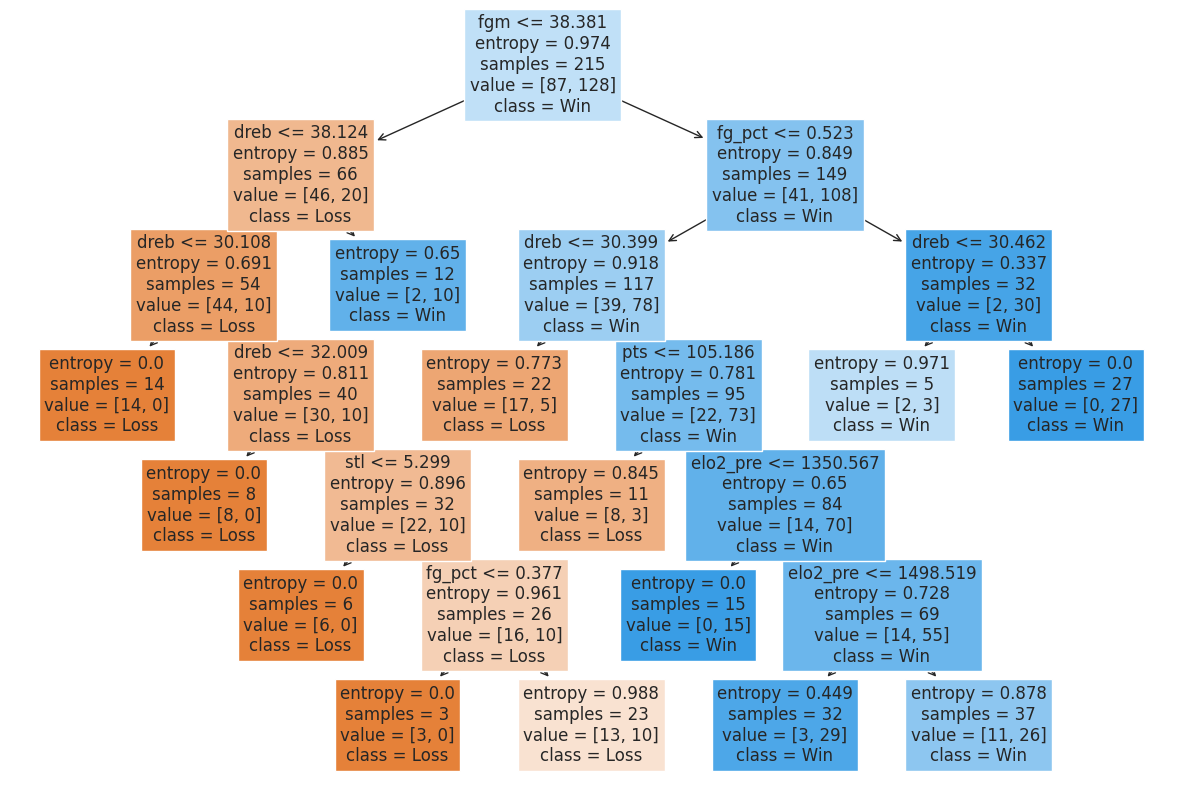

In [ ]:
#Pruned Tree Visualization
fig = plt.figure(figsize=(15,10))
# define class names
cnames = ['Loss','Win'] 
tree.plot_tree(prunedclf, fontsize=12, class_names = cnames, feature_names=X_decisionTree.columns, filled=True);

In [ ]:
#Accuracy Score of Pruned Tree w/o CV
y_pruned_pred = prunedclf.predict(X_decisionTree_test)
prunedscore = accuracy_score(y_decisionTree_test, y_pruned_pred)
prunedscore

0.6881720430107527

In [ ]:
#Accuracy Score of Pruned Tree with CV=10
pruned_accuracy_scores = cross_val_score(prunedclf, X_decisionTree_train, y_decisionTree_train, cv=10)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in pruned_accuracy_scores])
print('10-fold cross-validation mean accuracy:', round(pruned_accuracy_scores.mean(),4))

Accuracy scores of each fold:  ['0.727', '0.818', '0.818', '0.727', '0.591', '0.810', '0.905', '0.714', '0.857', '0.810']
10-fold cross-validation mean accuracy: 0.7777


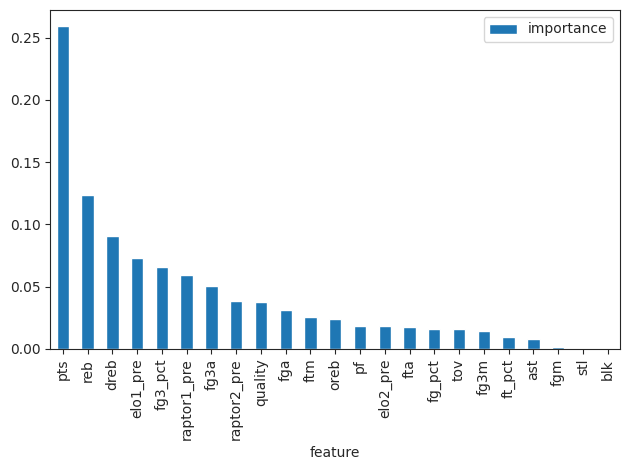

In [ ]:
#Feature Importance for Full Tree
fullimportances = full_clf.feature_importances_

# create a dataframe to store the values and their labels
full_feature_importances= pd.DataFrame({'feature': X_decisionTree_train.columns, 'importance': fullimportances})

# sort dataframe by descending order, showing the most important feature top
full_feature_importances = full_feature_importances.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = full_feature_importances.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

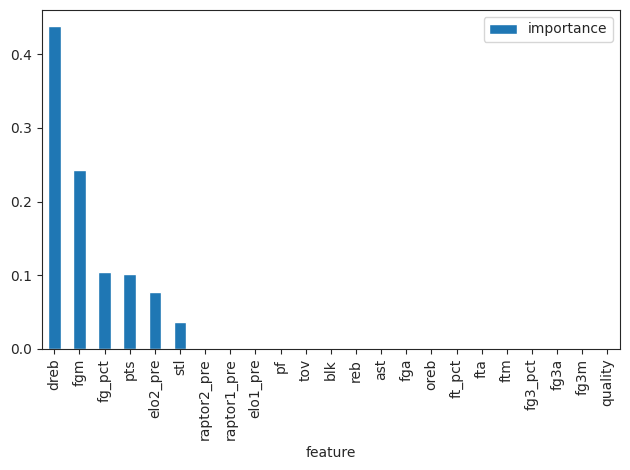

In [ ]:
#Feature Importance for Pruned Tree
prunedimportances = prunedclf.feature_importances_

# create a dataframe to store the values and their labels
feature_importance_pruned = pd.DataFrame({'feature': X_decisionTree_train.columns, 'importance': prunedimportances})

# sort dataframe by descending order, showing the most important feature top
feature_importance_pruned = feature_importance_pruned.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = feature_importance_pruned.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

In [ ]:
#Accuracy Score of Full Decision Tree on Season 23
yfull_pred = full_clf.predict(newcelt23)
yfull_pred
fullaccuracyscore = accuracy_score(celt23['wl'], yfull_pred)
fullaccuracyscore

0.6951219512195121

In [ ]:
#Accuracy Score of Pruned Decision Tree on Season 23
ypruned_pred = prunedclf.predict(newcelt23)
ypruned_pred
prunedaccuracyscore = accuracy_score(celt23['wl'], ypruned_pred)
prunedaccuracyscore

0.7926829268292683

<Axes: >

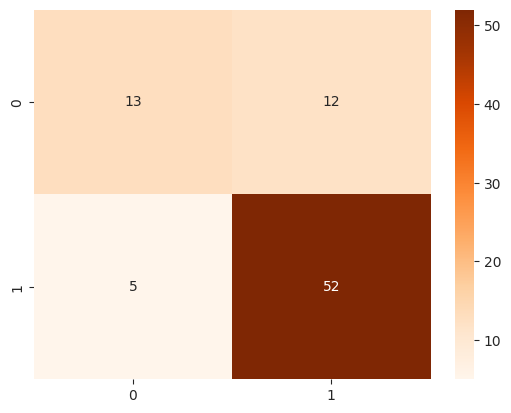

In [ ]:
#Pruned Tree Confusion Matrix on Season 23
prunedcm = confusion_matrix(celt23['wl'], ypruned_pred)
sns.heatmap(prunedcm, annot=True, cmap='Oranges')

# Random Forest

In [ ]:
#Random Forest
X_rf = newdf
y_rf = df['wl_x']
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.3, random_state = 1, stratify = y_rf)

In [ ]:
X_rf.columns

Index(['fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta',
       'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'elo1_pre', 'elo2_pre', 'raptor1_pre', 'raptor2_pre', 'quality'],
      dtype='object')

In [ ]:
#Accuracy Score of Random Forest w/o Hypertuning
rf = RandomForestClassifier(n_estimators=125, random_state=1, criterion="log_loss",n_jobs = -1)
rf.fit(X_rf_train, y_rf_train)
y_rf_pred = rf.predict(X_rf_test)
accuracy_score(y_rf_pred, y_rf_test)

0.8172043010752689

In [ ]:
# We create lists of all the values we want to search over
# This is called 'creating a grid'
param_grid = {
    'n_estimators': [75, 100, 125],
    'criterion' :['gini', 'entropy', 'log_loss'],
    'random_state': [1],
    'n_jobs': [-1]
}

# Then, use the GridSearchCV function which combines gridsearch with 
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring = 'accuracy')
gridSearch.fit(X_rf_train, y_rf_train)

print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)
print("Best: {0}, using {1}".format(gridSearch.cv_results_['mean_test_score'], gridSearch.best_params_))
results_df = pd.DataFrame(gridSearch.cv_results_)
results_df.transpose()

Best accuracy:  0.809090909090909
Parameter values to achieve best accuracy:  {'criterion': 'gini', 'n_estimators': 125, 'n_jobs': -1, 'random_state': 1}
Best: [0.79025974 0.80454545 0.80909091 0.79004329 0.78549784 0.79480519
 0.79004329 0.78549784 0.79480519], using {'criterion': 'gini', 'n_estimators': 125, 'n_jobs': -1, 'random_state': 1}


,0,1,2,3,4,5,6,7,8
mean_fit_time,0.440167,0.321438,0.214238,0.153116,0.210405,0.227271,0.224016,0.243861,0.217152
std_fit_time,0.613383,0.060088,0.006585,0.004838,0.064507,0.013943,0.067776,0.08682,0.011878
mean_score_time,0.027475,0.025136,0.027572,0.01903,0.023749,0.027221,0.021287,0.02469,0.027608
std_score_time,0.013323,0.003313,0.004296,0.002052,0.004029,0.003674,0.002386,0.003213,0.003556
param_criterion,gini,gini,gini,entropy,entropy,entropy,log_loss,log_loss,log_loss
param_n_estimators,75,100,125,75,100,125,75,100,125
param_n_jobs,-1,-1,-1,-1,-1,-1,-1,-1,-1
param_random_state,1,1,1,1,1,1,1,1,1
params,"{'criterion': 'gini', 'n_estimators': 75, 'n_j...","{'criterion': 'gini', 'n_estimators': 100, 'n_...","{'criterion': 'gini', 'n_estimators': 125, 'n_...","{'criterion': 'entropy', 'n_estimators': 75, '...","{'criterion': 'entropy', 'n_estimators': 100, ...","{'criterion': 'entropy', 'n_estimators': 125, ...","{'criterion': 'log_loss', 'n_estimators': 75, ...","{'criterion': 'log_loss', 'n_estimators': 100,...","{'criterion': 'log_loss', 'n_estimators': 125,..."
split0_test_score,0.818182,0.818182,0.818182,0.818182,0.818182,0.863636,0.818182,0.818182,0.863636


In [ ]:
#Accuracy Score of Hypertuned Random Forest w/o CV
hyperrf = RandomForestClassifier(criterion = 'gini', n_estimators = 125, random_state=1, n_jobs = -1)
hyperrf.fit(X_rf_train, y_rf_train)
y_hyperrf_pred = hyperrf.predict(X_rf_test)
accuracy_score(y_rf_test, y_hyperrf_pred)

0.7849462365591398

In [ ]:
#Accuracy Score of Hypertuned Random Forest with CV
hyperrf_accuracy_scores = cross_val_score(hyperrf, X_rf_train, y_rf_train, cv=10)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in hyperrf_accuracy_scores])
print('10-fold cross-validation mean accuracy:', round(hyperrf_accuracy_scores.mean(),4))

Accuracy scores of each fold:  ['0.818', '0.818', '0.909', '0.773', '0.773', '0.810', '0.810', '0.667', '0.857', '0.857']
10-fold cross-validation mean accuracy: 0.8091


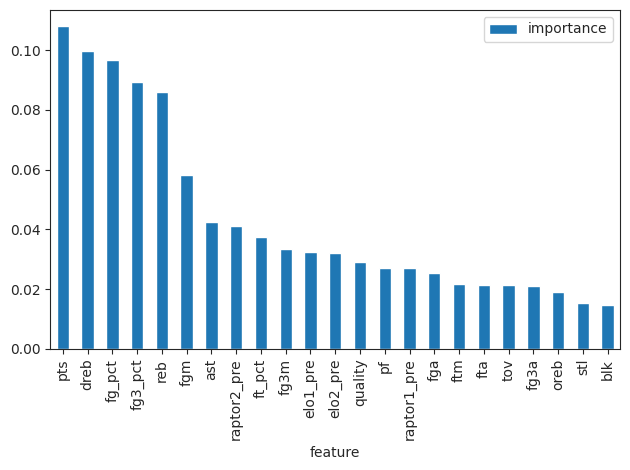

In [ ]:
#Feature Importance for Random Forest
rfimportances = hyperrf.feature_importances_

# create a dataframe to store the values and their labels
rf_feature_importances= pd.DataFrame({'feature': X_rf_train.columns, 'importance': rfimportances})

# sort dataframe by descending order, showing the most important feature top
rf_feature_importances = rf_feature_importances.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = rf_feature_importances.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

In [ ]:
#
yrf_pred = hyperrf.predict(newcelt23)
yrf_pred
fullaccuracyscore = accuracy_score(celt23['wl'], yrf_pred)
fullaccuracyscore

0.8292682926829268